<a href="https://colab.research.google.com/github/zainamri/Kelompok-3-/blob/main/AnalisisDataGZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import Ridge
import math

In [50]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/datasetbisa/olahdatakuisioner.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Pemahaman Data

In [51]:
# Menampilkan data teratas
data.head()

,Jenis Kelamin,Usia,Status Pekerjaan,Penghasilan Bulanan,Lokasi Tempat Tinggal,Seberapa sering Anda membeli produk fashion melalui e-commerce?,Platform E-Commerce yang sering digunakan untuk membeli produk fashion,Seberapa penting bagi Anda untuk membaca ulasan produk sebelum membeli produk fashion di e-commerce?,Ulasan positif dari pelanggan lain membuat saya lebih yakin untuk membeli produk fashion.,Apakah Anda percaya bahwa ulasan produk yang banyak membantu dalam pengambilan keputusan Anda saat membeli produk fashion secara online?,...,Saya lebih cenderung membeli produk fashion dengan rating tinggi (4 bintang ke atas) di e-commerce.,Rating produk yang tinggi menunjukkan bahwa produk tersebut berkualitas baik dan dapat dipercaya.,Saya selalu melihat rating produk terlebih dahulu sebelum memutuskan untuk membeli produk fashion di e-commerce.,"Saya merasa lebih percaya membeli produk fashion yang memiliki rating tinggi dibandingkan yang memiliki rating rendah, meskipun harga lebih tinggi.",Saya tidak akan membeli produk dengan rating rendah meskipun harganya menarik di e-commerce.,Saya merasa lebih tertarik membeli produk fashion setelah membaca ulasan positif dari pelanggan lain di e-commerce.,Harga yang terjangkau membuat saya lebih tertarik untuk membeli produk fashion melalui e-commerce.,Saya lebih tertarik membeli produk fashion yang memiliki rating tinggi di e-commerce dibandingkan dengan produk yang memiliki rating rendah.,Saya merasa lebih yakin membeli produk fashion jika produk tersebut memiliki banyak ulasan positif dan rating tinggi.,Saya akan lebih cenderung membeli produk fashion yang harganya sesuai dengan kualitas dan memiliki rating tinggi.
0,Laki - laki,18 - 22 Tahun,Berkerja,Rp2.000.000 - Rp4.000.000,Kota Besar,Kadang-Kadang,Shopee,5,5,5,...,5,5,5,5,5,5,3,5,5,5
1,Laki - laki,18 - 22 Tahun,Berkerja,Rp4.000.000 - Rp6.000.000,Kota Menengah,Kadang-Kadang,Shopee,5,5,4,...,4,4,4,5,4,4,3,4,4,4
2,Laki - laki,18 - 22 Tahun,Pelajar/Mahasiswa,Kurang dari Rp2.000.000,Kota Besar,Cukup Sering,Shopee,5,5,5,...,5,5,5,4,3,4,4,5,4,4
3,Laki - laki,18 - 22 Tahun,Pelajar/Mahasiswa,Tidak Bekerja,Kota Besar,Kadang-Kadang,Tokopedia,4,3,3,...,3,5,5,3,2,5,4,3,5,4
4,Laki - laki,18 - 22 Tahun,Pelajar/Mahasiswa,Tidak Bekerja,Kota Kecil/ Kabupaten,Kadang-Kadang,Shopee,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [52]:
# Menampilkan Info Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                               --------------  ----- 
 0   Jenis Kelamin                                                                                                                                        200 non-null    object
 1   Usia                                                                                                                                                 200 non-null    object
 2   Status Pekerjaan                                                                                                                                     200 non-null    object
 3   Pengh

In [53]:
data.describe()

,Seberapa penting bagi Anda untuk membaca ulasan produk sebelum membeli produk fashion di e-commerce?,Ulasan positif dari pelanggan lain membuat saya lebih yakin untuk membeli produk fashion.,Apakah Anda percaya bahwa ulasan produk yang banyak membantu dalam pengambilan keputusan Anda saat membeli produk fashion secara online?,Saya lebih cenderung membeli produk fashion jika ulasan yang ada memberikan informasi yang detail tentang kualitas dan fit produk.,Harga produk fashion adalah faktor yang sangat mempengaruhi keputusan saya dalam berbelanja di e-commerce.,Saya lebih memilih produk fashion yang sedang diskon atau memiliki penawaran harga menarik di e-commerce.,Harga produk di e-commerce seringkali menjadi pertimbangan utama saya dibandingkan dengan kualitas produk itu sendiri.,Saya merasa bahwa harga produk fashion di e-commerce sering lebih terjangkau dibandingkan dengan harga di toko fisik.,"Saya lebih tertarik membeli produk fashion yang harganya sesuai dengan kualitas yang ditawarkan, meskipun harga sedikit lebih tinggi.",Saya lebih cenderung membeli produk fashion dengan rating tinggi (4 bintang ke atas) di e-commerce.,Rating produk yang tinggi menunjukkan bahwa produk tersebut berkualitas baik dan dapat dipercaya.,Saya selalu melihat rating produk terlebih dahulu sebelum memutuskan untuk membeli produk fashion di e-commerce.,"Saya merasa lebih percaya membeli produk fashion yang memiliki rating tinggi dibandingkan yang memiliki rating rendah, meskipun harga lebih tinggi.",Saya tidak akan membeli produk dengan rating rendah meskipun harganya menarik di e-commerce.,Saya merasa lebih tertarik membeli produk fashion setelah membaca ulasan positif dari pelanggan lain di e-commerce.,Harga yang terjangkau membuat saya lebih tertarik untuk membeli produk fashion melalui e-commerce.,Saya lebih tertarik membeli produk fashion yang memiliki rating tinggi di e-commerce dibandingkan dengan produk yang memiliki rating rendah.,Saya merasa lebih yakin membeli produk fashion jika produk tersebut memiliki banyak ulasan positif dan rating tinggi.,Saya akan lebih cenderung membeli produk fashion yang harganya sesuai dengan kualitas dan memiliki rating tinggi.
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,4.74000,4.600000,4.385000,4.615000,3.995000,4.0700,3.515000,4.295000,4.385000,4.645000,4.440000,4.565000,4.360000,4.370000,4.430000,4.050000,4.450000,4.495000,4.490000
std,0.62799,0.679935,0.793678,0.754734,0.953689,0.9216,1.129671,0.855356,0.806241,0.671737,0.720413,0.719977,0.789631,0.852487,0.786251,0.944436,0.755216,0.736674,0.743413
min,1.00000,1.000000,2.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,5.00000,4.000000,4.000000,4.000000,3.000000,3.0000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000
50%,5.00000,5.000000,5.000000,5.000000,4.000000,4.0000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000
75%,5.00000,5.000000,5.000000,5.000000,5.000000,5.0000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.00000,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# 2. Pembersihan Data

In [54]:
# Periksa nilai kosong
nilai_kosong = data.isnull().sum().sum()
print("Nilai Kosong:")
if nilai_kosong == 0:
    print("Tidak ada nilai kosong")
else:
    print(f"Terjadi {nilai_kosong} nilai kosong")

# Periksa nilai duplikat
jumlah_duplikat = data.duplicated().sum()
print("\nNilai Duplikat:")
if jumlah_duplikat == 0:
    print("Tidak ada duplikat")
else:
    print(f"Terjadi {jumlah_duplikat} duplikat")


Nilai Kosong:
Tidak ada nilai kosong

Nilai Duplikat:
Tidak ada duplikat


mengganti nama kolom , supaya memudahkan analisa

In [55]:
# Mengganti nama kolom
data.rename(columns={ 'Seberapa sering Anda membeli produk fashion melalui e-commerce?': 'Seberapa sering',
                      'Platform E-Commerce yang sering digunakan untuk membeli produk fashion': 'Platform E-Commerce'
}, inplace=True)
# Mengganti nama kolom untuk variabel independen
data.rename(columns={
    'Seberapa penting bagi Anda untuk membaca ulasan produk sebelum membeli produk fashion di e-commerce?': 'X101',
    'Ulasan positif dari pelanggan lain membuat saya lebih yakin untuk membeli produk fashion.': 'X102',
    'Apakah Anda percaya bahwa ulasan produk yang banyak membantu dalam pengambilan keputusan Anda saat membeli produk fashion secara online?': 'X103',
    'Saya lebih cenderung membeli produk fashion jika ulasan yang ada memberikan informasi yang detail tentang kualitas dan fit produk.': 'X104',
    'Harga produk fashion adalah faktor yang sangat mempengaruhi keputusan saya dalam berbelanja di e-commerce.': 'X201',
    'Saya lebih memilih produk fashion yang sedang diskon atau memiliki penawaran harga menarik di e-commerce.': 'X202',
    'Harga produk di e-commerce seringkali menjadi pertimbangan utama saya dibandingkan dengan kualitas produk itu sendiri.': 'X203',
    'Saya merasa bahwa harga produk fashion di e-commerce sering lebih terjangkau dibandingkan dengan harga di toko fisik.': 'X204',
    'Saya lebih tertarik membeli produk fashion yang harganya sesuai dengan kualitas yang ditawarkan, meskipun harga sedikit lebih tinggi.': 'X205',
    'Saya lebih cenderung membeli produk fashion dengan rating tinggi (4 bintang ke atas) di e-commerce.': 'X301',
    'Rating produk yang tinggi menunjukkan bahwa produk tersebut berkualitas baik dan dapat dipercaya.': 'X302',
    'Saya selalu melihat rating produk terlebih dahulu sebelum memutuskan untuk membeli produk fashion di e-commerce.': 'X303',
    'Saya merasa lebih percaya membeli produk fashion yang memiliki rating tinggi dibandingkan yang memiliki rating rendah, meskipun harga lebih tinggi.': 'X304',
    'Saya tidak akan membeli produk dengan rating rendah meskipun harganya menarik di e-commerce.': 'X305'
}, inplace=True)

# Mengganti nama kolom untuk variabel dependen
data.rename(columns={
    'Saya merasa lebih tertarik membeli produk fashion setelah membaca ulasan positif dari pelanggan lain di e-commerce.': 'Y1',
    'Harga yang terjangkau membuat saya lebih tertarik untuk membeli produk fashion melalui e-commerce.': 'Y2',
    'Saya lebih tertarik membeli produk fashion yang memiliki rating tinggi di e-commerce dibandingkan dengan produk yang memiliki rating rendah.': 'Y3',
    'Saya merasa lebih yakin membeli produk fashion jika produk tersebut memiliki banyak ulasan positif dan rating tinggi.': 'Y4',
    'Saya akan lebih cenderung membeli produk fashion yang harganya sesuai dengan kualitas dan memiliki rating tinggi.': 'Y5'
}, inplace=True)


In [56]:
# Menambahkan kolom Total
kolom_total = ['X101', 'X102', 'X103', 'X104',
               'X201', 'X202', 'X203', 'X204', 'X205',
               'X301', 'X302', 'X303', 'X304', 'X305',
               'Y1', 'Y2', 'Y3', 'Y4', 'Y5']

# Menjumlahkan kolom yang ditentukan
data['Total'] = data[kolom_total].sum(axis=1)

# Menghitung Rtabel
alpha = 0.05
df = 200  # Derajat kebebasan

# Menghitung t kritis
t_critical = stats.t.ppf(1 - alpha/2, df)
print(f"Rtabel (t kritis) dengan 200 derajat kebebasan: {t_critical}")

# Menghitung Rtabel
n = 200  # Jumlah responden
rtabel = t_critical / (n ** 0.5)
print(f"Rtabel: {rtabel}")

# Menghitung Korelasi dan Validitas untuk setiap variabel X
validity_results = {}

for col in kolom_total:  # Menggunakan kolom yang ditentukan
    correlation = data[col].corr(data['Total'])  # Korelasi dengan total
    validity = "Valid" if correlation > rtabel else "Tidak Valid"

    validity_results[col] = {
        'Korelasi': correlation,
        'Rtabel': rtabel,
        'Validitas': validity
    }

# Menampilkan hasil
for var, results in validity_results.items():
    print(f"{var}: Korelasi = {results['Korelasi']}, Rtabel = {results['Rtabel']}, Validitas = {results['Validitas']}")

Rtabel (t kritis) dengan 200 derajat kebebasan: 1.9718962236316089
Rtabel: 0.13943411915260553
X101: Korelasi = 0.5688145573245594, Rtabel = 0.13943411915260553, Validitas = Valid
X102: Korelasi = 0.6479176004014937, Rtabel = 0.13943411915260553, Validitas = Valid
X103: Korelasi = 0.5719926565766502, Rtabel = 0.13943411915260553, Validitas = Valid
X104: Korelasi = 0.6761330100843405, Rtabel = 0.13943411915260553, Validitas = Valid
X201: Korelasi = 0.5627104133552127, Rtabel = 0.13943411915260553, Validitas = Valid
X202: Korelasi = 0.5414433997799245, Rtabel = 0.13943411915260553, Validitas = Valid
X203: Korelasi = 0.3910074277614932, Rtabel = 0.13943411915260553, Validitas = Valid
X204: Korelasi = 0.6319002234268057, Rtabel = 0.13943411915260553, Validitas = Valid
X205: Korelasi = 0.5486932368978166, Rtabel = 0.13943411915260553, Validitas = Valid
X301: Korelasi = 0.7374061718600802, Rtabel = 0.13943411915260553, Validitas = Valid
X302: Korelasi = 0.718827628856263, Rtabel = 0.13943411

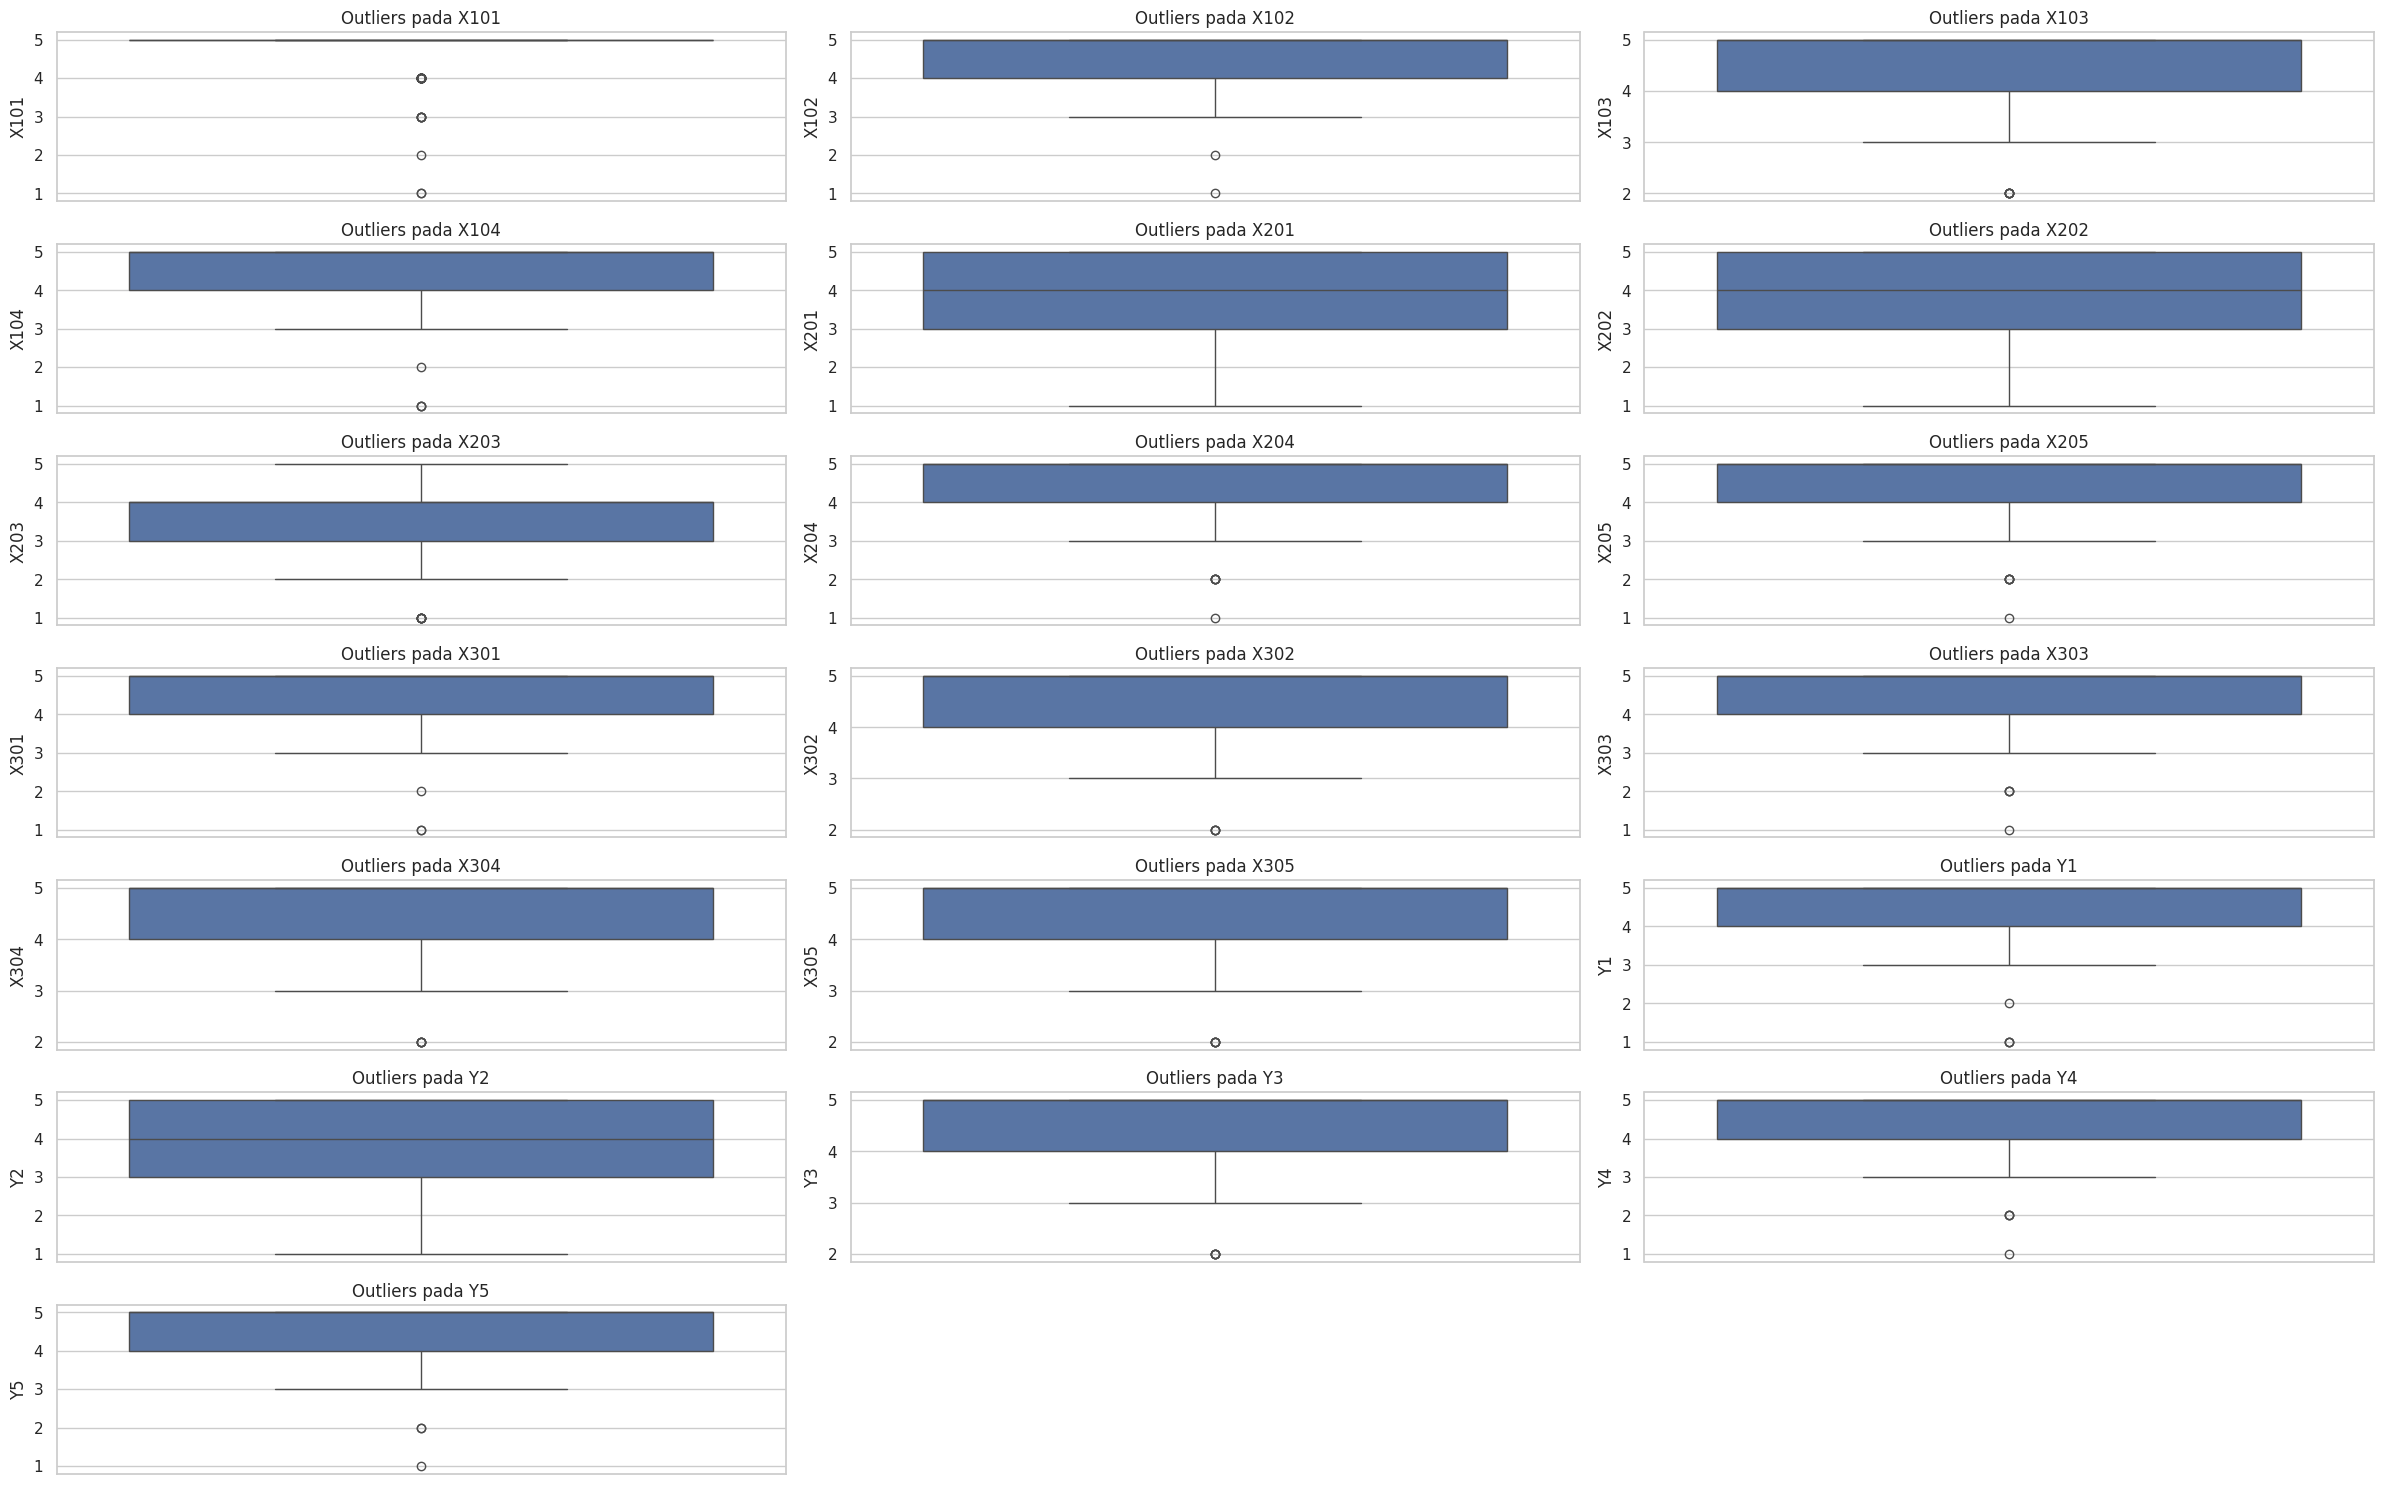

In [57]:
# Deteksi outliers
# Mengambil semua kolom numerik
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols[numeric_cols != 'Total']  # Mengecualikan kolom 'Total'
# Menentukan jumlah kolom dan baris untuk subplot
num_cols = 3  # jumlah kolom yang diinginkan
num_rows = math.ceil(len(numeric_cols) / num_cols)  # menghitung jumlah baris

# Visualisasi boxplot untuk mendeteksi outliers pada semua kolom numerik
plt.figure(figsize=(24, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Outliers pada {col}')

plt.tight_layout()
plt.show()

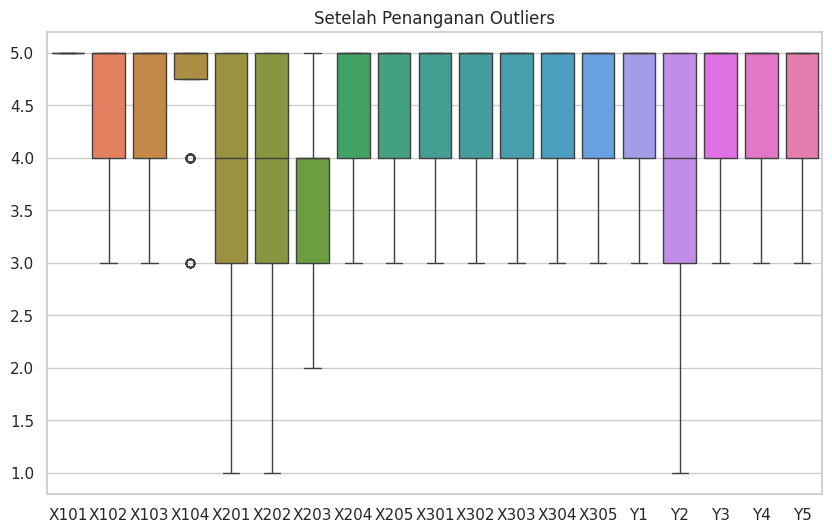

In [58]:
# Fungsi untuk menangani outliers
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].median()
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])

# Penanganan Outliers
for column in data.columns[6:]:  # Mengambil kolom dari indeks 6
    if pd.api.types.is_numeric_dtype(data[column]) and column != 'Total':  # Mengecualikan kolom 'Total'
        handle_outliers(data, column)

# Visualisasi Setelah Penanganan
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, 6:-1])  # Mengambil kolom dari indeks 6 hingga sebelum kolom terakhir (Total)
plt.title("Setelah Penanganan Outliers")
plt.show()

# 3. Analisis Deskriptif

In [59]:
# Hitung statistik deskriptif
data.describe()

,X101,X102,X103,X104,X201,X202,X203,X204,X205,X301,X302,X303,X304,X305,Y1,Y2,Y3,Y4,Y5,Total
count,200.0,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5.0,4.635000,4.475000,4.690000,3.995000,4.0700,3.620000,4.39000,4.480000,4.700000,4.500000,4.630000,4.435000,4.445000,4.5050,4.050000,4.525000,4.560000,4.540000,82.895000
std,0.0,0.602987,0.679473,0.579291,0.953689,0.9216,1.025112,0.74206,0.672205,0.530478,0.634043,0.595713,0.698725,0.768066,0.6419,0.944436,0.649217,0.623171,0.656165,9.531433
min,5.0,3.000000,3.000000,3.000000,1.000000,1.0000,2.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0000,1.000000,3.000000,3.000000,3.000000,31.000000
25%,5.0,4.000000,4.000000,4.750000,3.000000,3.0000,3.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0000,3.000000,4.000000,4.000000,4.000000,79.000000
50%,5.0,5.000000,5.000000,5.000000,4.000000,4.0000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,4.000000,5.000000,5.000000,5.000000,84.500000
75%,5.0,5.000000,5.000000,5.000000,5.000000,5.0000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,89.000000
max,5.0,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,95.000000



membuat distribusi frekuensi setiap variabel (independen dan dependen)

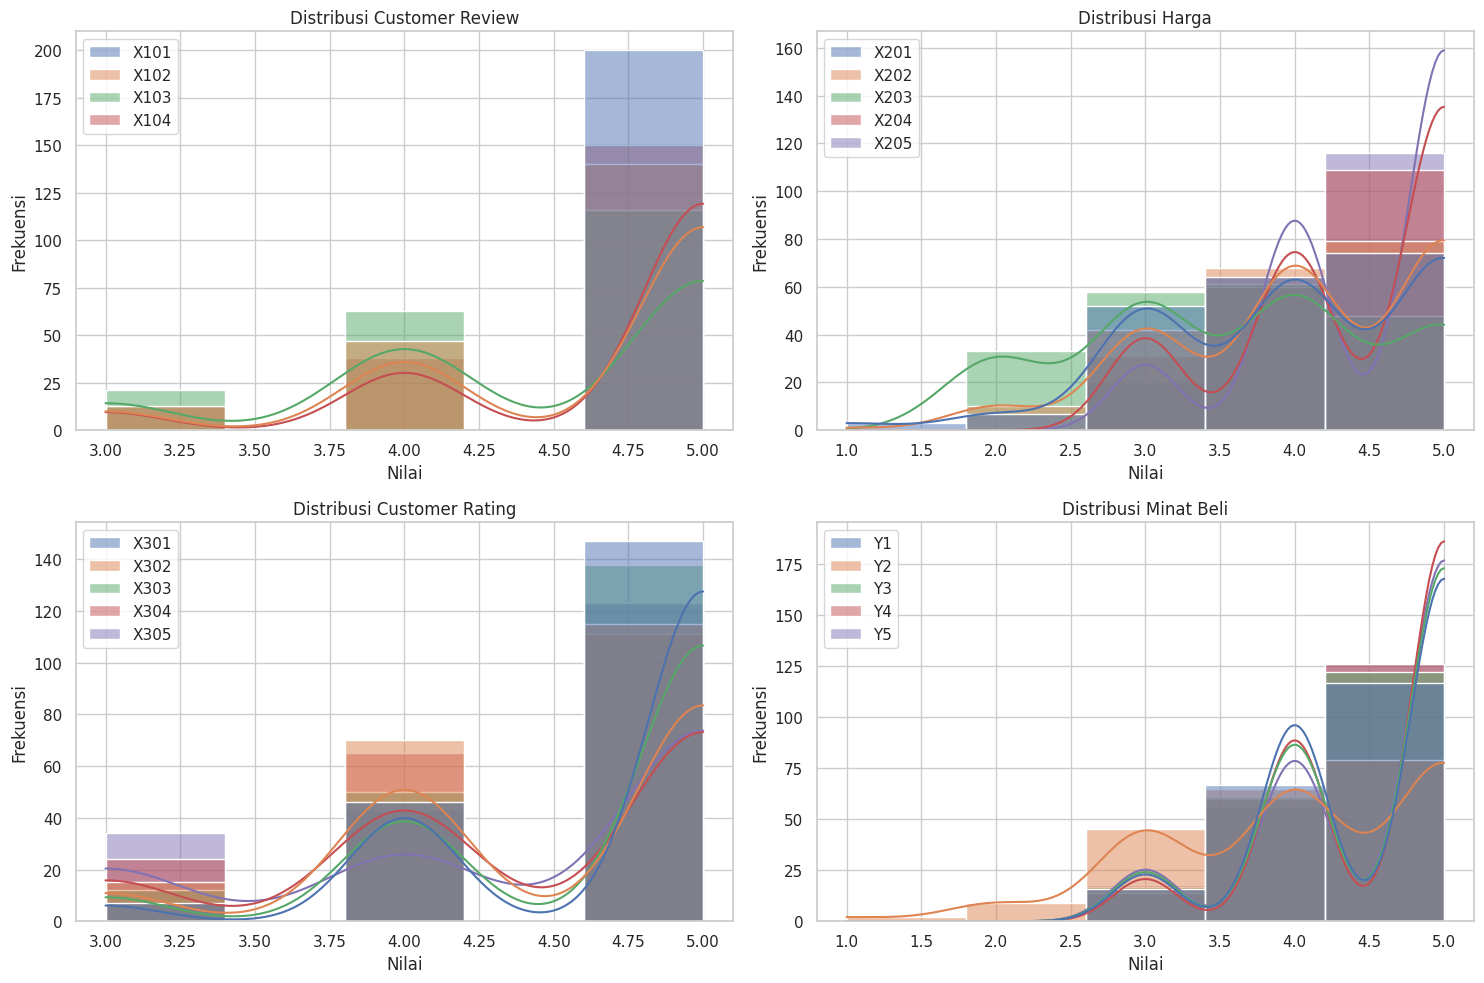

In [60]:
# Visualisasi Histogram
# Membuat DataFrame untuk variabel independen
customer_review = data[['X101', 'X102', 'X103', 'X104']]
harga = data[['X201', 'X202', 'X203', 'X204', 'X205']]
customer_rating = data[['X301', 'X302', 'X303', 'X304', 'X305']]
# Membuat DataFrame untuk variabel dependen
minat_beli = data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']]

# Menggabungkan semua DataFrame menjadi satu DataFrame utama
final_data = pd.concat([customer_review, harga, customer_rating, minat_beli], axis=1)
# Membuat subplot untuk setiap kategori
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Histogram untuk variabel customer review
sns.histplot(final_data[['X101', 'X102', 'X103', 'X104']], bins=5, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribusi Customer Review')
axs[0, 0].set_xlabel('Nilai')
axs[0, 0].set_ylabel('Frekuensi')

# Histogram untuk variabel harga
sns.histplot(final_data[['X201', 'X202', 'X203', 'X204', 'X205']], bins=5, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribusi Harga')
axs[0, 1].set_xlabel('Nilai')
axs[0, 1].set_ylabel('Frekuensi')

# Histogram untuk variabel customer rating
sns.histplot(final_data[['X301', 'X302', 'X303', 'X304', 'X305']], bins=5, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribusi Customer Rating')
axs[1, 0].set_xlabel('Nilai')
axs[1, 0].set_ylabel('Frekuensi')

# Histogram untuk variabel minat beli
sns.histplot(final_data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']], bins=5, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribusi Minat Beli')
axs[1, 1].set_xlabel('Nilai')
axs[1, 1].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()


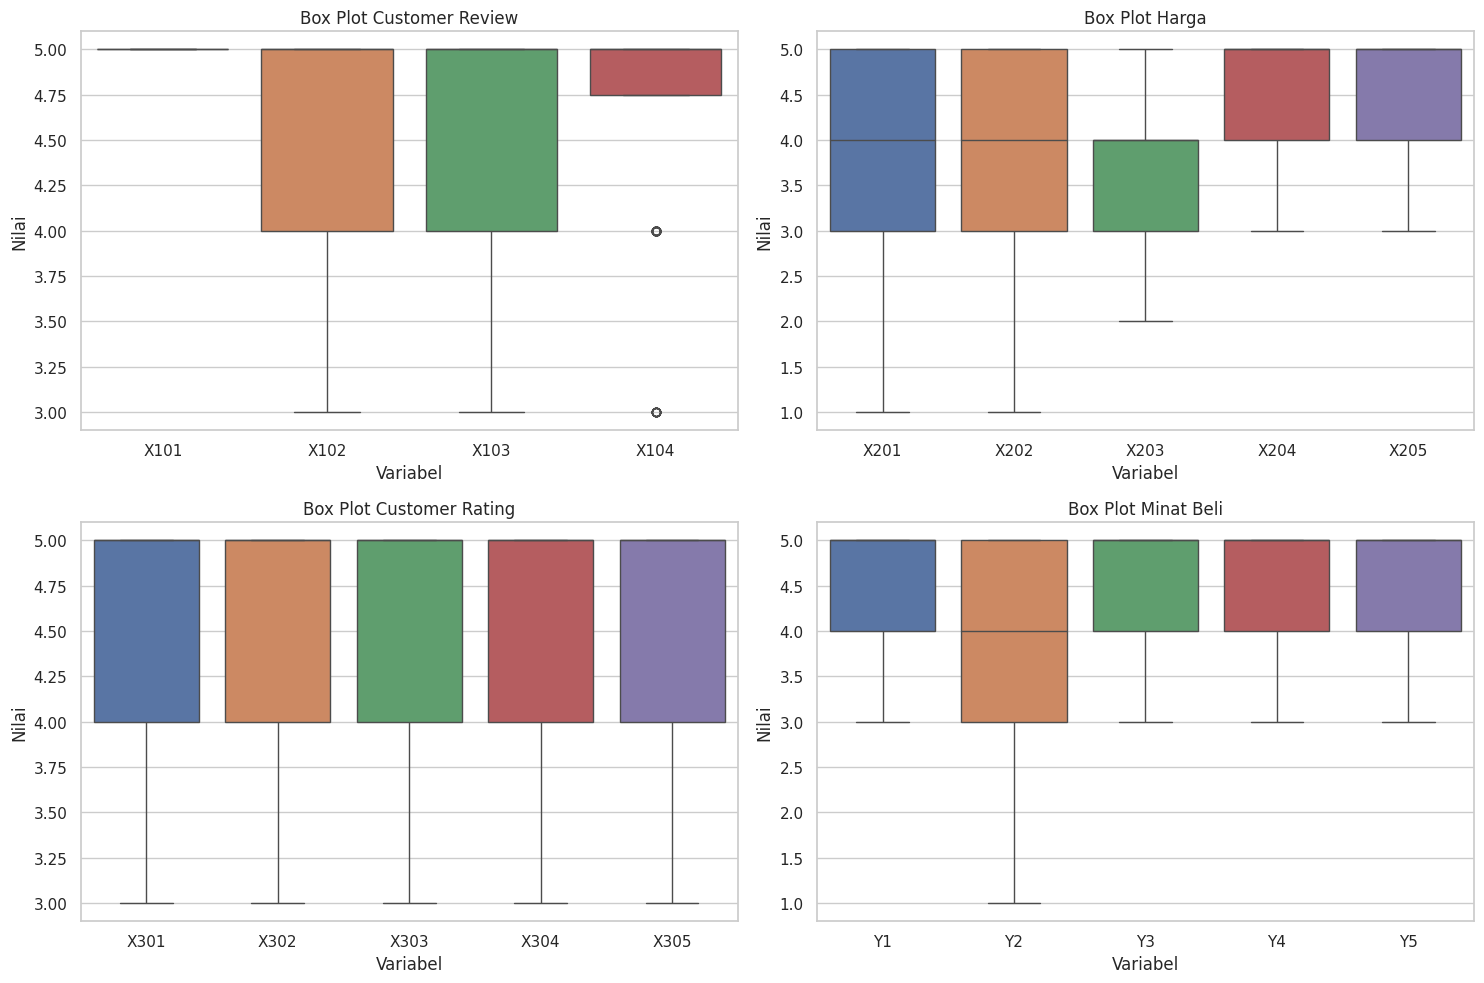

In [61]:
# Visualisasi Box Plot untuk setiap kategori
plt.figure(figsize=(15, 10))

# Box Plot untuk variabel customer review
plt.subplot(2, 2, 1)
sns.boxplot(data=final_data[['X101', 'X102', 'X103', 'X104']])
plt.title('Box Plot Customer Review')
plt.xlabel('Variabel')
plt.ylabel('Nilai')

# Box Plot untuk variabel harga
plt.subplot(2, 2, 2)
sns.boxplot(data=final_data[['X201', 'X202', 'X203', 'X204', 'X205']])
plt.title('Box Plot Harga')
plt.xlabel('Variabel')
plt.ylabel('Nilai')

# Box Plot untuk variabel customer rating
plt.subplot(2, 2, 3)
sns.boxplot(data=final_data[['X301', 'X302', 'X303', 'X304', 'X305']])
plt.title('Box Plot Customer Rating')
plt.xlabel('Variabel')
plt.ylabel('Nilai')

# Box Plot untuk variabel minat beli
plt.subplot(2, 2, 4)
sns.boxplot(data=final_data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']])
plt.title('Box Plot Minat Beli')
plt.xlabel('Variabel')
plt.ylabel('Nilai')

plt.tight_layout()
plt.show()


# 4. Identifikasi Tren dan Pola

1. Analisis Hubungan Antar Variabel



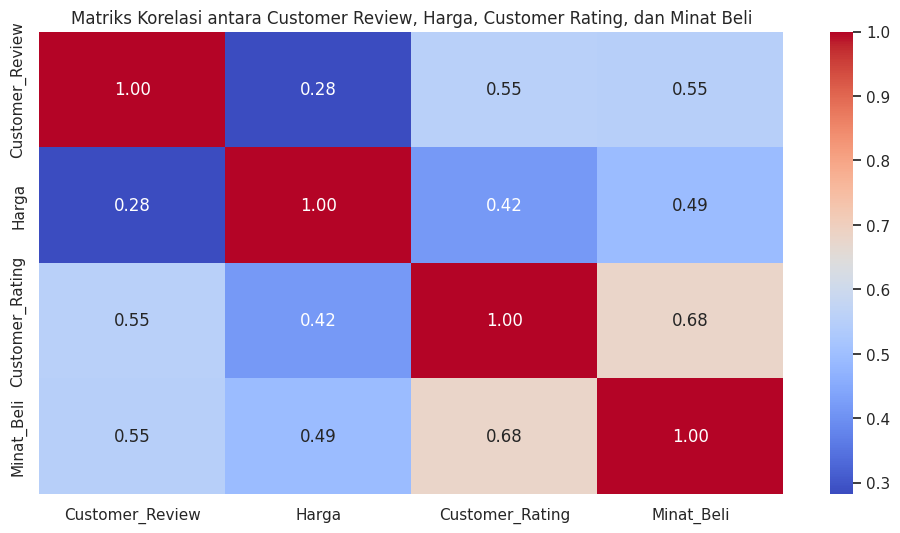

In [62]:
# Menghitung rata-rata untuk setiap kelompok
customer_review_avg = data[['X101', 'X102', 'X103', 'X104']].mean(axis=1, skipna=True)
harga_avg = data[['X201', 'X202', 'X203', 'X204', 'X205']].mean(axis=1, skipna=True)
customer_rating_avg = data[['X301', 'X302', 'X303', 'X304', 'X305']].mean(axis=1, skipna=True)
minat_beli_avg = data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']].mean(axis=1, skipna=True)

# Membuat DataFrame baru dengan hasil perhitungan
summary_df = pd.DataFrame({
    'Customer_Review': customer_review_avg,
    'Harga': harga_avg,
    'Customer_Rating': customer_rating_avg,
    'Minat_Beli': minat_beli_avg
})

# 1. Menghitung matriks korelasi
correlation_matrix = summary_df.corr()

# 2. Visualisasi Matriks Korelasi
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi antara Customer Review, Harga, Customer Rating, dan Minat Beli')
plt.show()

*   keterangan Analisis Matriks Korelasi
*   Korelasi Positif:
**Customer Review dan Customer Rating**: Korelasi sebesar 0.55 menunjukkan bahwa ada hubungan positif yang moderat antara ulasan pelanggan dan penilaian pelanggan. Artinya, semakin tinggi ulasan pelanggan, semakin tinggi pula penilaian yang diberikan.
**Customer Rating dan Minat Beli**: Korelasi sebesar 0.68 menunjukkan hubungan positif yang lebih kuat antara penilaian pelanggan dan minat beli. Ini menunjukkan bahwa penilaian yang lebih baik cenderung meningkatkan minat beli.
**Customer Review dan Minat Beli**: Korelasi sebesar 0.55 juga menunjukkan hubungan positif yang moderat, menunjukkan bahwa ulasan yang lebih baik dapat meningkatkan minat beli.
*   Korelasi Lemah:
**Harga dan Customer Rating**: Korelasi sebesar 0.42 menunjukkan hubungan positif yang lemah. Ini mungkin menunjukkan bahwa harga tidak terlalu berpengaruh terhadap penilaian pelanggan.
**Harga dan Minat Beli**: Korelasi sebesar 0.49 menunjukkan hubungan positif yang moderat, tetapi tidak sekuat hubungan antara penilaian pelanggan dan minat beli.

*   Korelasi Antara Variabel: Tidak ada korelasi negatif yang signifikan antara variabel-variabel tersebut, yang menunjukkan bahwa semua variabel cenderung bergerak dalam arah yang sama.



2. Identifikasi Pola dengan kolom-kolom Demografis

<ipython-input-77-ac40556bc70f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status Pekerjaan', data=data, ax=axes[1, 0], palette='pastel')
<ipython-input-77-ac40556bc70f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Lokasi Tempat Tinggal', data=data, ax=axes[1, 1], palette='pastel')
<ipython-input-77-ac40556bc70f>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Penghasilan Bulanan', data=data, ax=axes[2, 0], palette='pastel')
<ipython-input-77-ac40556bc70f>:39: FutureWarning: 

Passing `palette` without assigning 

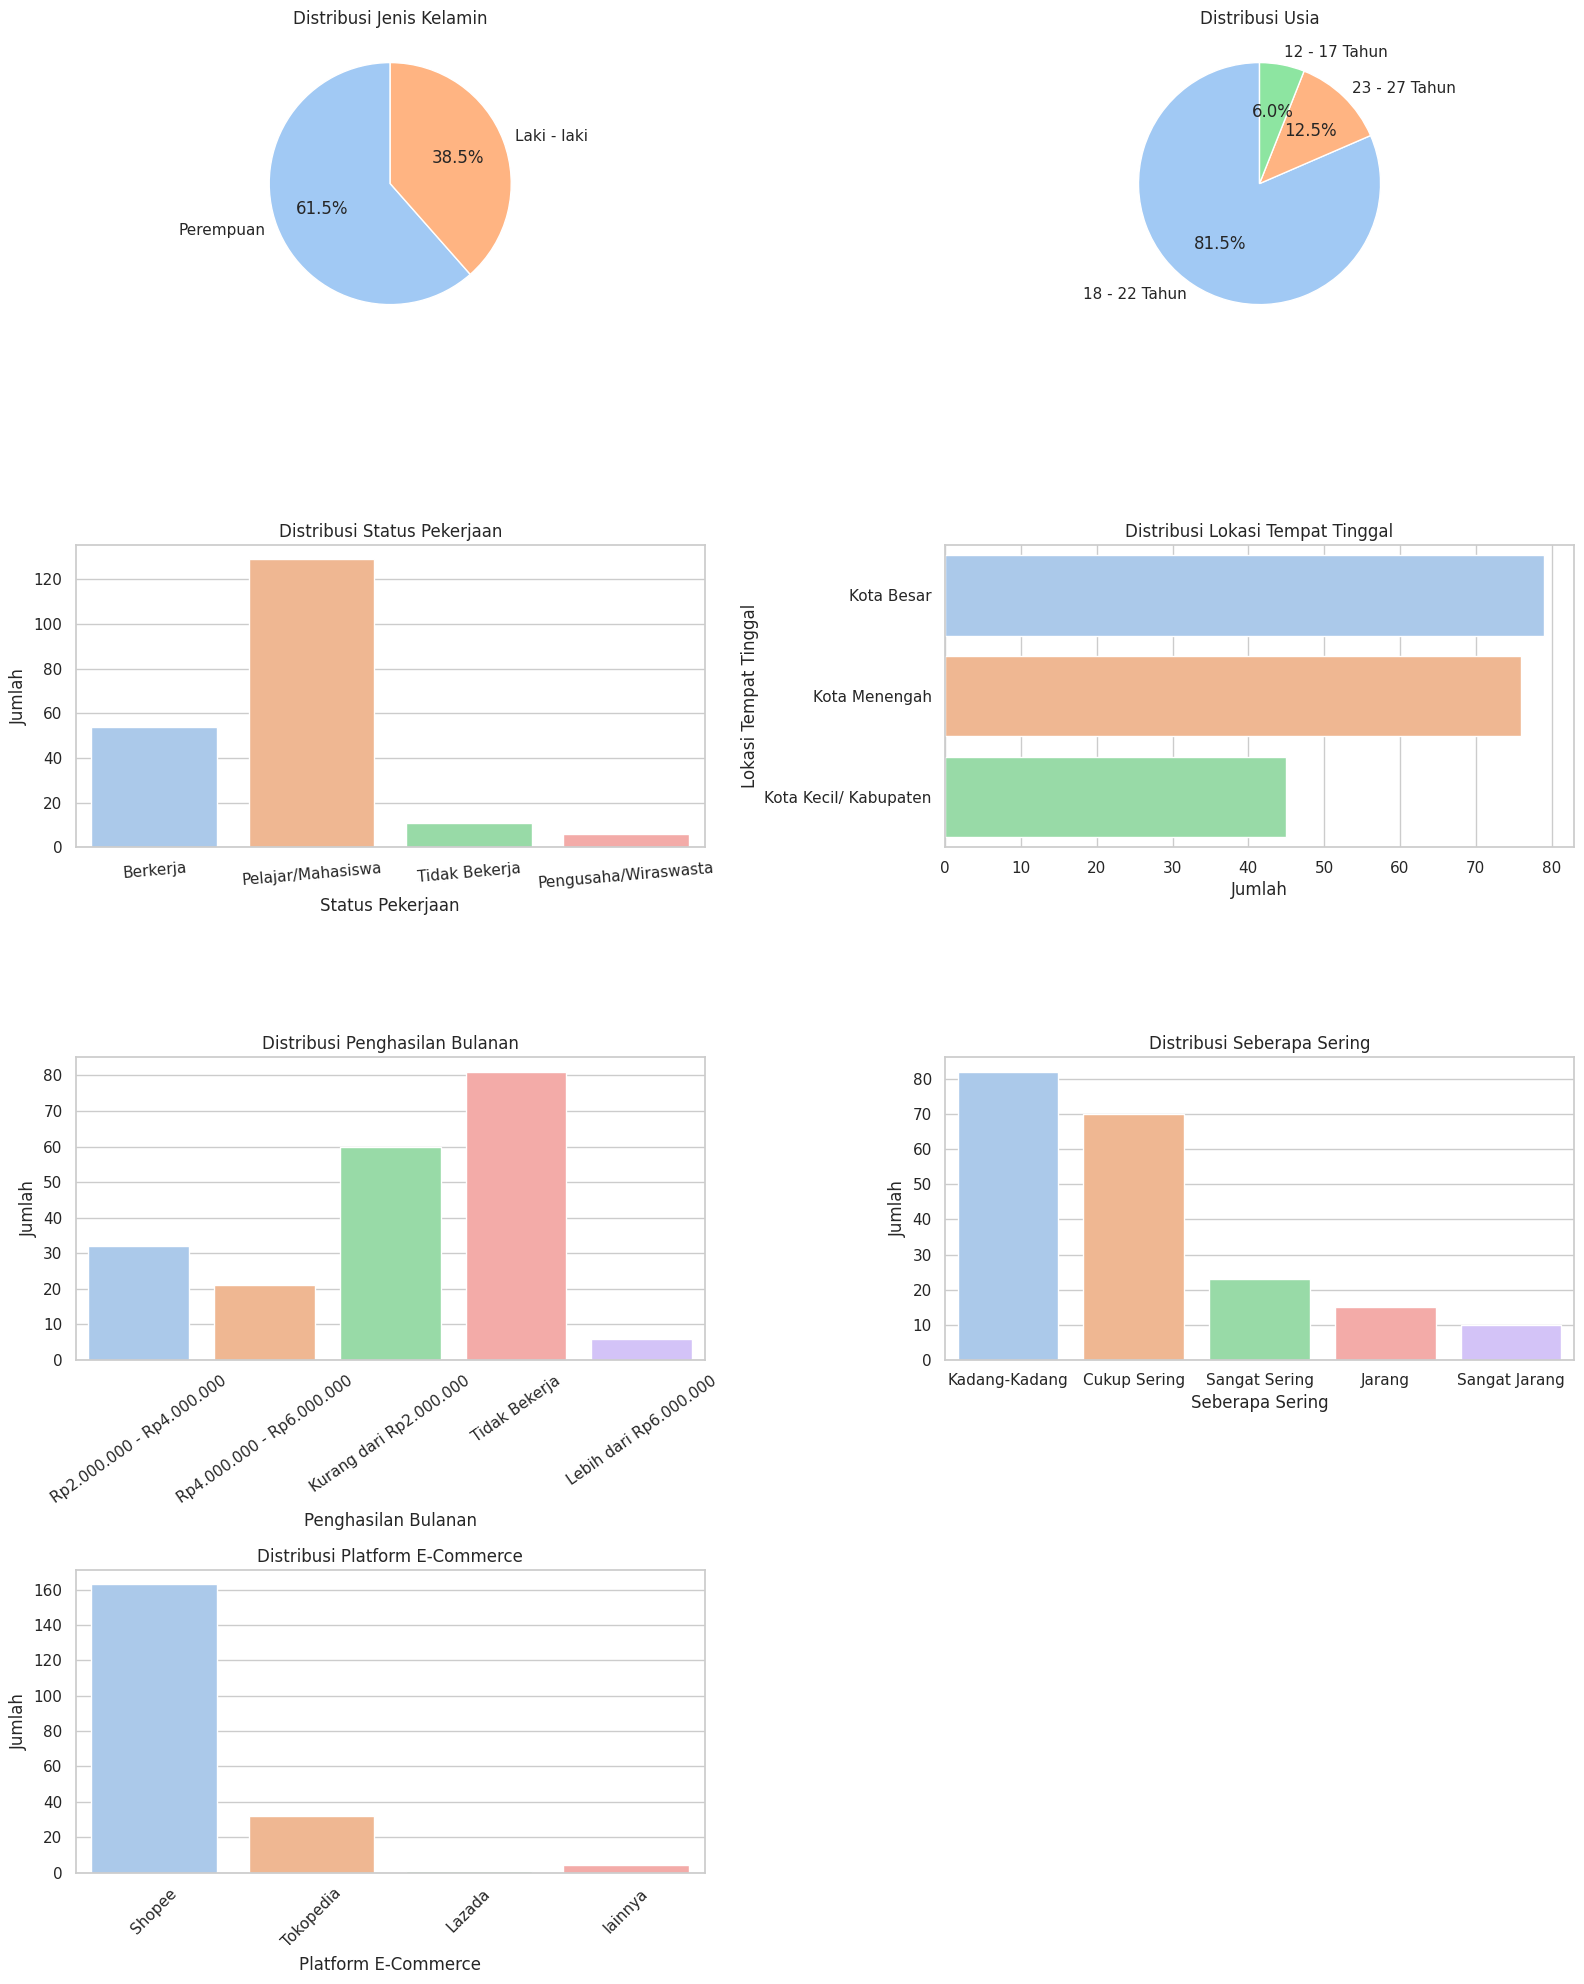

In [77]:
# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat figure dengan 4 baris dan 2 kolom
fig, axes = plt.subplots(4, 2, figsize=(16, 20))

# 1. Analisis Jenis Kelamin (Pie Chart)
jenis_kelamin_counts = data['Jenis Kelamin'].value_counts()
axes[0, 0].pie(jenis_kelamin_counts, labels=jenis_kelamin_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0, 0].set_title('Distribusi Jenis Kelamin')

# 2. Analisis Usia (Pie Chart)
usia_counts = data['Usia'].value_counts()
axes[0, 1].pie(usia_counts, labels=usia_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0, 1].set_title('Distribusi Usia')

# 3. Analisis Status Pekerjaan (Bar Chart)
sns.countplot(x='Status Pekerjaan', data=data, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Distribusi Status Pekerjaan')
axes[1, 0].set_xlabel('Status Pekerjaan')
axes[1, 0].set_ylabel('Jumlah')
axes[1, 0].tick_params(axis='x', rotation=5)

# 4. Analisis Lokasi Tempat Tinggal (Bar Chart)
sns.countplot(y='Lokasi Tempat Tinggal', data=data, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Distribusi Lokasi Tempat Tinggal')
axes[1, 1].set_xlabel('Jumlah')
axes[1, 1].set_ylabel('Lokasi Tempat Tinggal')

# 5. Analisis Penghasilan Bulanan (Bar Chart)
sns.countplot(x='Penghasilan Bulanan', data=data, ax=axes[2, 0], palette='pastel')
axes[2, 0].set_title('Distribusi Penghasilan Bulanan')
axes[2, 0].set_xlabel('Penghasilan Bulanan')
axes[2, 0].set_ylabel('Jumlah')
axes[2, 0].tick_params(axis='x', rotation=35)

# 6. Analisis Seberapa Sering (Bar Chart)
seberapa_sering_counts = data['Seberapa sering'].value_counts()
sns.barplot(x=seberapa_sering_counts.index, y=seberapa_sering_counts.values, ax=axes[2, 1], palette='pastel')
axes[2, 1].set_title('Distribusi Seberapa Sering')
axes[2, 1].set_xlabel('Seberapa Sering')
axes[2, 1].set_ylabel('Jumlah')

# 7. Analisis Platform E-Commerce (Bar Chart)
sns.countplot(x='Platform E-Commerce', data=data, ax=axes[3, 0], palette='pastel')
axes[3, 0].set_title('Distribusi Platform E-Commerce')
axes[3, 0].set_xlabel('Platform E-Commerce')
axes[3, 0].set_ylabel('Jumlah')
axes[3, 0].tick_params(axis='x', rotation=45)

# Menyembunyikan subplot yang tidak digunakan
axes[3, 1].axis('off')

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()


# 5. Hubungan Antar Variabel

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Jenis Kelamin          200 non-null    object 
 1   Usia                   200 non-null    object 
 2   Status Pekerjaan       200 non-null    object 
 3   Penghasilan Bulanan    200 non-null    object 
 4   Lokasi Tempat Tinggal  200 non-null    object 
 5   Seberapa sering        200 non-null    object 
 6   Platform E-Commerce    200 non-null    object 
 7   X101                   200 non-null    float64
 8   X102                   200 non-null    float64
 9   X103                   200 non-null    float64
 10  X104                   200 non-null    float64
 11  X201                   200 non-null    float64
 12  X202                   200 non-null    float64
 13  X203                   200 non-null    float64
 14  X204                   200 non-null    float64
 15  X205  

In [65]:
# Menghitung rata-rata untuk setiap kelompok
customer_review_avg = data[['X101', 'X102', 'X103', 'X104']].mean(axis=1)
harga_avg = data[['X201', 'X202', 'X203', 'X204', 'X205']].mean(axis=1)
customer_rating_avg = data[['X301', 'X302', 'X303', 'X304', 'X305']].mean(axis=1)
minat_beli_avg = data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']].mean(axis=1)

# Membuat DataFrame baru dengan hasil perhitungan
summary_df = pd.DataFrame({
    'Customer_Review': customer_review_avg,
    'Harga': harga_avg,
    'Customer_Rating': customer_rating_avg,
    'Minat_Beli': minat_beli_avg
})

# Menangani nilai yang hilang
summary_df = summary_df.dropna()

# Menyiapkan data untuk regresi
X = summary_df[['Customer_Review', 'Harga', 'Customer_Rating']]
y = summary_df['Minat_Beli']

# Menambahkan intercept
X = sm.add_constant(X)

# Membuat model regresi
model = sm.OLS(y, X).fit()

# Menampilkan ringkasan hasil model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Minat_Beli   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     80.17
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           6.96e-34
Time:                        23:47:38   Log-Likelihood:                -70.347
No. Observations:                 200   AIC:                             148.7
Df Residuals:                     196   BIC:                             161.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4068      0.347     

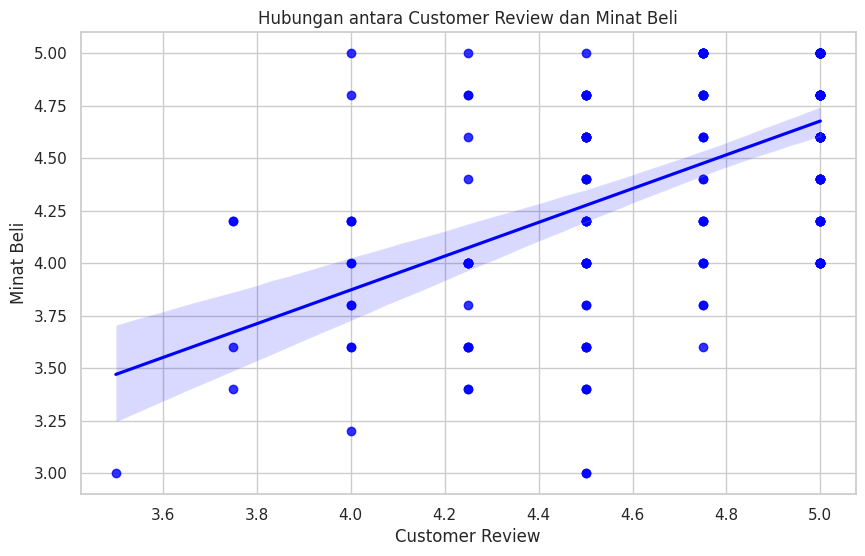

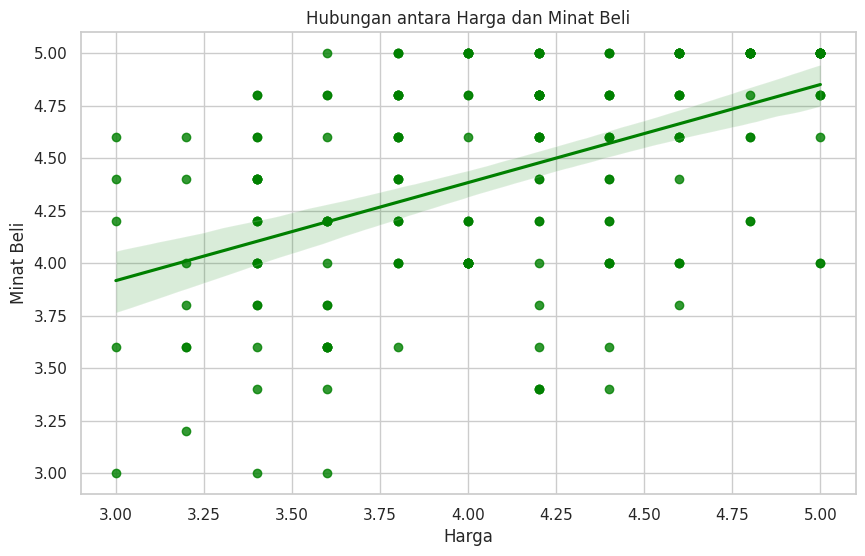

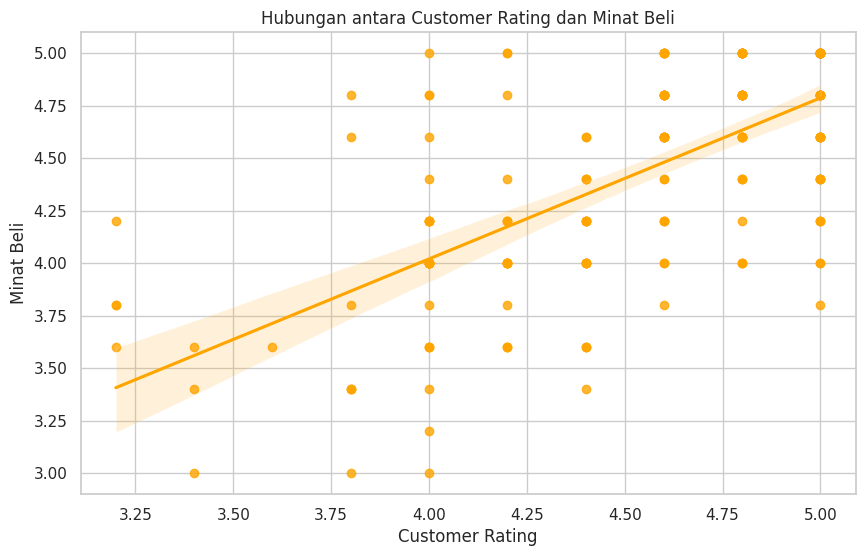

In [66]:
# Visualisasi hubungan antara variabel
# a. Hubungan antara Customer Review dan Minat Beli
plt.figure(figsize=(10, 6))
sns.regplot(x='Customer_Review', y='Minat_Beli', data=summary_df, marker='o', color='blue')
plt.title('Hubungan antara Customer Review dan Minat Beli')
plt.xlabel('Customer Review')
plt.ylabel('Minat Beli')
plt.show()

# b. Hubungan antara Harga dan Minat Beli
plt.figure(figsize=(10, 6))
sns.regplot(x='Harga', y='Minat_Beli', data=summary_df, marker='o', color='green')
plt.title('Hubungan antara Harga dan Minat Beli')
plt.xlabel('Harga')
plt.ylabel('Minat Beli')
plt.show()

# c. Hubungan antara Customer Rating dan Minat Beli
plt.figure(figsize=(10, 6))
sns.regplot(x='Customer_Rating', y='Minat_Beli', data=summary_df, marker='o', color='orange')
plt.title('Hubungan antara Customer Rating dan Minat Beli')
plt.xlabel('Customer Rating')
plt.ylabel('Minat Beli')
plt.show()